In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.tseries.offsets import *
%matplotlib inline

In [2]:
DATA_DIR = "../data/"

ALL_DATA_RAW = DATA_DIR + "all_loan_data_raw.csv"
ALL_DATA = DATA_DIR + "all_loan_data.csv"

TRAIN_DATA = DATA_DIR + "train_data.csv"
BALANCED_TRAIN_DATA = DATA_DIR + "balanced_train_data.csv"

BALANCED_TEST_DATA = DATA_DIR + "balanced_test_data.csv"
TEST_DATA = DATA_DIR + "test_data.csv"

In [3]:
data = pd.read_csv(ALL_DATA)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
data.shape


(756878, 71)

In [7]:
data.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [6]:
data = data.drop(data.columns[0], 1)


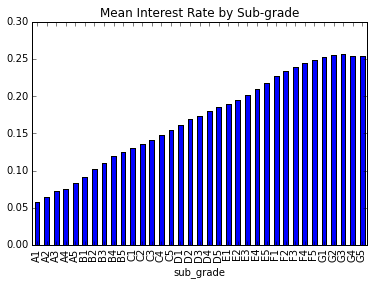

In [9]:
data.groupby('sub_grade')['int_rate'].mean().plot(title='Mean Interest Rate by Sub-grade', kind='bar')

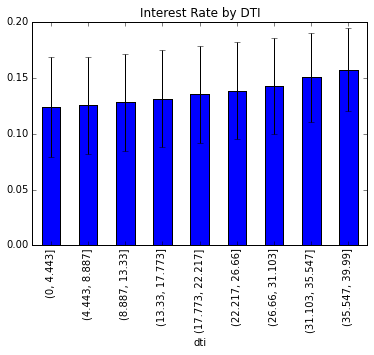

In [12]:
dti_gb['int_rate'].mean().plot(title='Interest Rate by DTI', kind='bar', yerr=dti_gb['int_rate'].std())

In [11]:
dti_bins = np.linspace(data['dti'].min(), data['dti'].max(), 10)
dti_gb = data.groupby(pd.cut(data['dti'], dti_bins))

In [13]:
data.columns


Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

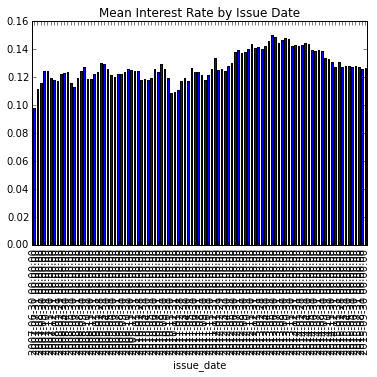

In [16]:
data.groupby('issue_date')['int_rate'].mean().plot(title='Mean Interest Rate by Issue Date', kind='bar')

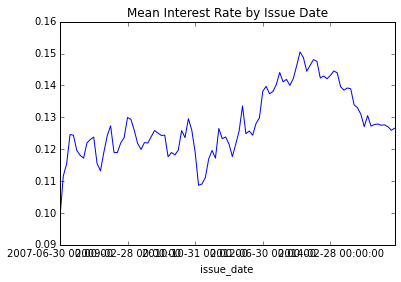

In [17]:
data.groupby('issue_date')['int_rate'].mean().plot(title='Mean Interest Rate by Issue Date', kind='line')

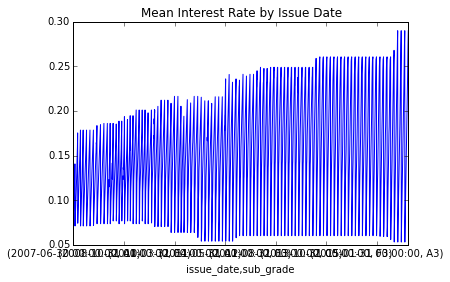

In [21]:
data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean().plot(title='Mean Interest Rate by Issue Date', kind='line')

In [22]:
data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean()



issue_date           sub_grade
2007-06-30 00:00:00  A1           0.071200
                     A2           0.074300
                     A3           0.077500
                     A5           0.083800
                     B2           0.090100
                     B3           0.093300
                     B4           0.096400
                     B5           0.099600
                     C1           0.102800
                     C2           0.105900
                     C3           0.109100
                     C4           0.112200
                     D3           0.124900
                     E2           0.137500
                     E3           0.140700
2007-07-31 00:00:00  A1           0.071200
                     A2           0.074300
                     A3           0.077500
                     A4           0.080700
                     A5           0.083800
                     B1           0.087000
                     B2           0.090100
                     B3

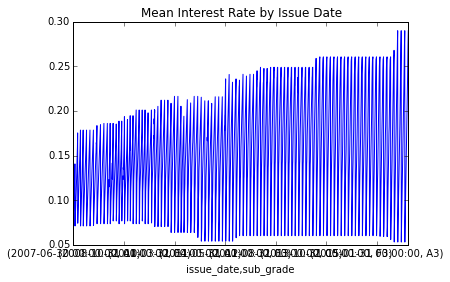

In [23]:
data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean().plot(title='Mean Interest Rate by Issue Date')

In [24]:
data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean().melt()

AttributeError: 'Series' object has no attribute 'melt'

In [25]:
ir_grade_ts = data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean()

In [26]:
type(ir_grade_ts)

pandas.core.series.Series

In [27]:
ir_grade_ts


issue_date           sub_grade
2007-06-30 00:00:00  A1           0.071200
                     A2           0.074300
                     A3           0.077500
                     A5           0.083800
                     B2           0.090100
                     B3           0.093300
                     B4           0.096400
                     B5           0.099600
                     C1           0.102800
                     C2           0.105900
                     C3           0.109100
                     C4           0.112200
                     D3           0.124900
                     E2           0.137500
                     E3           0.140700
2007-07-31 00:00:00  A1           0.071200
                     A2           0.074300
                     A3           0.077500
                     A4           0.080700
                     A5           0.083800
                     B1           0.087000
                     B2           0.090100
                     B3

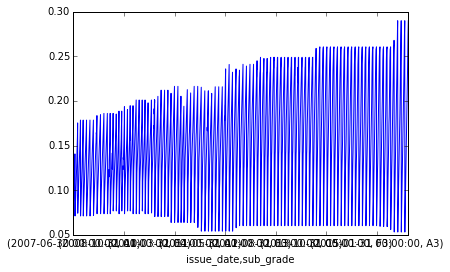

In [28]:
ir_grade_ts.plot()


In [29]:
ir_ts_grade = data.groupby(['issue_date', 'sub_grade'])['int_rate'].mean()

In [31]:
ir_grade_ts = data.groupby(['sub_grade', 'issue_date'])['int_rate'].mean()

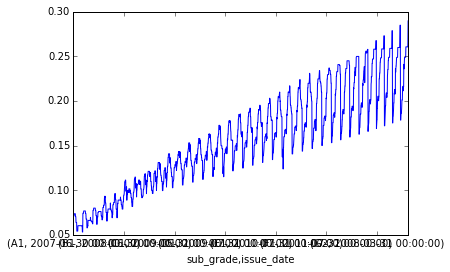

In [33]:
ir_grade_ts.plot()



In [34]:
data.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [37]:
data['loan_status'].value_counts()

Current                                                 520784
Fully Paid                                              176203
Charged Off                                              38029
Late (31-120 days)                                        9949
In Grace Period                                           6486
Late (16-30 days)                                         2337
Does not meet the credit policy.  Status:Fully Paid       1973
Does not meet the credit policy.  Status:Charged Off       761
Default                                                    199
Issued                                                     142
Does not meet the credit policy.  Status:Current            15
Name: loan_status, dtype: int64

In [38]:
data2 = data


In [41]:
data2['loan_amnt'] / data2['annual_inc']

0         0.208333
1         0.083333
2         0.195886
3         0.203252
4         0.037500
5         0.138889
6         0.148923
7         0.062500
8         0.140000
9         0.358333
10        0.090278
11        0.160000
12        0.300000
13        0.200000
14        0.100000
15        0.035714
16        0.238095
17        0.032727
18        0.071429
19        0.118886
20        0.466913
21        0.200000
22        0.200000
23        0.200000
24        0.078947
25        0.163043
26        0.250000
27        0.099992
28        0.037736
29        0.340000
            ...   
756848    0.277778
756849    0.087500
756850    0.214286
756851    0.152941
756852    0.499074
756853    0.066667
756854    0.460000
756855    0.263158
756856    0.359615
756857    0.242718
756858    0.288043
756859    0.454545
756860    0.323077
756861    0.160000
756862    0.230556
756863    0.199537
756864    0.438333
756865    0.300000
756866    0.133333
756867    0.122807
756868    0.080000
756869    0.

In [40]:
data.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [ ]:
import constants


In [42]:
print "hello"

hello


In [43]:
DATA_DIR = "../data/"
RESULTS_DIR = "../output/results/"

#Merged set of loans across years
ALL_DATA = "loans.pkl"
RPP_DATA = DATA_DIR + 'rpp_by_state.csv'

In [44]:
print RPP_DATA


../data/rpp_by_state.csv


In [45]:
rpp_data = pd.read_csv(RPP_DATA)

In [46]:
rpp_data


State       RPP
0     AL  0.877500
1     AK  1.061167
2     AZ  0.986667
3     AR  0.873167
4     CA  1.130500
5     CO  1.012833
6     CT  1.095167
7     DE  1.021333
8     DC  1.172833
9     FL  0.994500
10    GA  0.924333
11    HI  1.171000
12    ID  0.938500
13    IL  1.008000
14    IN  0.914000
15    IA  0.895167
16    KS  0.901333
17    KY  0.887833
18    LA  0.911500
19    ME  0.977000
20    MD  1.108500
21    MA  1.076833
22    MI  0.947833
23    MN  0.974333
24    MS  0.864833
25    MO  0.885167
26    MT  0.943000
27    NE  0.901500
28    NV  0.996833
29    NH  1.061833
30    NJ  1.140000
31    NM  0.948000
32    NY  1.152000
33    NC  0.917000
34    ND  0.897667
35    OH  0.896333
36    OK  0.895500
37    OR  0.985833
38    PA  0.983833
39    RI  0.992333
40    SC  0.908500
41    SD  0.872000
42    TN  0.904667
43    TX  0.964167
44    UT  0.971667
45    VT  1.002000
46    VA  1.030833
47    WA  1.032000
48    WV  0.880500
49    WI  0.930167
50    WY  0.961167

In [47]:
rpp_data['val_of_100_dollar'] = np.nan

In [50]:
rpp_data


State       RPP  val_of_100_dollar
0     AL  0.877500         113.960114
1     AK  1.061167          94.235904
2     AZ  0.986667         101.351351
3     AR  0.873167         114.525673
4     CA  1.130500          88.456435
5     CO  1.012833          98.732927
6     CT  1.095167          91.310303
7     DE  1.021333          97.911227
8     DC  1.172833          85.263607
9     FL  0.994500         100.553042
10    GA  0.924333         108.186080
11    HI  1.171000          85.397096
12    ID  0.938500         106.553010
13    IL  1.008000          99.206349
14    IN  0.914000         109.409190
15    IA  0.895167         111.711041
16    KS  0.901333         110.946746
17    KY  0.887833         112.633753
18    LA  0.911500         109.709270
19    ME  0.977000         102.354145
20    MD  1.108500          90.211998
21    MA  1.076833          92.864882
22    MI  0.947833         105.503781
23    MN  0.974333         102.634280
24    MS  0.864833         115.629216
25    MO  0.885167         112.973075
26    MT  0.943000         106.044539
27    NE  0.901500         110.926234
28    NV  0.996833         100.317673
29    NH  1.061833          94.176738
30    NJ  1.140000          87.719298
31    NM  0.948000         105.485232
32    NY  1.152000          86.805556
33    NC  0.917000         109.051254
34    ND  0.897667         111.399926
35    OH  0.896333         111.565638
36    OK  0.895500         111.669458
37    OR  0.985833         101.437025
38    PA  0.983833         101.643232
39    RI  0.992333         100.772590
40    SC  0.908500         110.071547
41    SD  0.872000         114.678899
42    TN  0.904667         110.537951
43    TX  0.964167         103.716508
44    UT  0.971667         102.915952
45    VT  1.002000          99.800399
46    VA  1.030833          97.008893
47    WA  1.032000          96.899225
48    WV  0.880500         113.571834
49    WI  0.930167         107.507615
50    WY  0.961167         104.040229

In [49]:
rpp_data['val_of_100_dollar'] = 100 / rpp_data['RPP'] 

In [51]:
plot(rpp_data)

NameError: name 'plot' is not defined

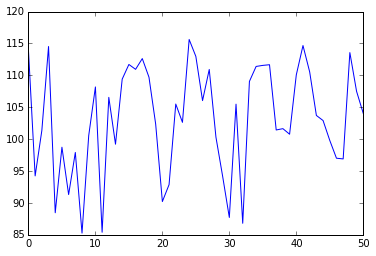

In [52]:
rpp_data['val_of_100_dollar'].plot()

In [57]:
rpd = rpp_data.sort_values(by = 'val_of_100_dollar')

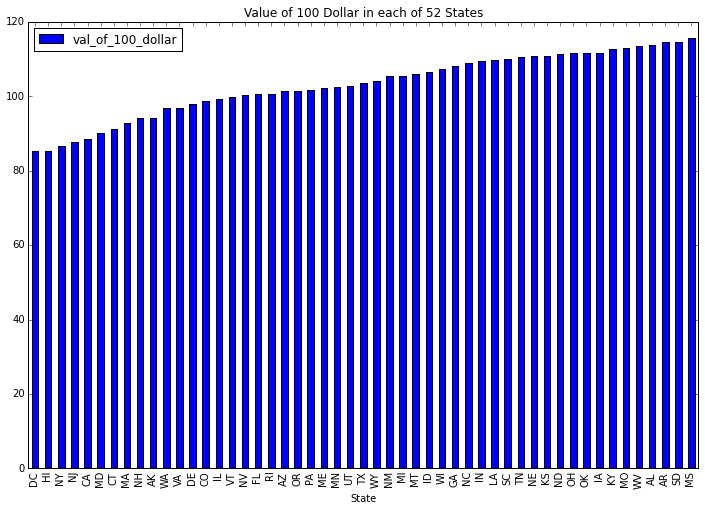

In [62]:
rpd.plot(x='State', y='val_of_100_dollar', kind='bar', title = "Value of 100 Dollar in each of 52 States")

In [60]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 12, 8

In [63]:
data.shape

(756878, 71)

In [76]:
dfm = data.merge(rpp_data, left_on='addr_state', right_on='State')

In [65]:
dfm.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [66]:
dfm[['addr_state', 'State', 'RPP']]

addr_state State       RPP
0              AZ    AZ  0.986667
1              AZ    AZ  0.986667
2              AZ    AZ  0.986667
3              AZ    AZ  0.986667
4              AZ    AZ  0.986667
5              AZ    AZ  0.986667
6              AZ    AZ  0.986667
7              AZ    AZ  0.986667
8              AZ    AZ  0.986667
9              AZ    AZ  0.986667
10             AZ    AZ  0.986667
11             AZ    AZ  0.986667
12             AZ    AZ  0.986667
13             AZ    AZ  0.986667
14             AZ    AZ  0.986667
15             AZ    AZ  0.986667
16             AZ    AZ  0.986667
17             AZ    AZ  0.986667
18             AZ    AZ  0.986667
19             AZ    AZ  0.986667
20             AZ    AZ  0.986667
21             AZ    AZ  0.986667
22             AZ    AZ  0.986667
23             AZ    AZ  0.986667
24             AZ    AZ  0.986667
25             AZ    AZ  0.986667
26             AZ    AZ  0.986667
27             AZ    AZ  0.986667
28             AZ    AZ  0.986667
29             AZ    AZ  0.986667
...           ...   ...       ...
756848         ND    ND  0.897667
756849         ND    ND  0.897667
756850         ND    ND  0.897667
756851         ND    ND  0.897667
756852         ND    ND  0.897667
756853         ND    ND  0.897667
756854         ND    ND  0.897667
756855         ND    ND  0.897667
756856         ND    ND  0.897667
756857         ND    ND  0.897667
756858         ND    ND  0.897667
756859         ND    ND  0.897667
756860         ND    ND  0.897667
756861         ND    ND  0.897667
756862         ND    ND  0.897667
756863         ND    ND  0.897667
756864         ND    ND  0.897667
756865         ND    ND  0.897667
756866         ND    ND  0.897667
756867         ND    ND  0.897667
756868         ND    ND  0.897667
756869         ND    ND  0.897667
756870         ND    ND  0.897667
756871         ND    ND  0.897667
756872         ND    ND  0.897667
756873         ND    ND  0.897667
756874         ND    ND  0.897667
756875         ND    ND  0.897667
756876         ND    ND  0.897667
756877         ND    ND  0.897667

[756878 rows x 3 columns]

In [67]:
RPP_ADJ_VARS = ["loan_amnt",
                "installment",
                "annual_inc",
                "open_acc",
                "revol_bal",
                "out_prncp",
                "out_prncp_inv",
                "total_pymnt",
                "total_pymnt_inv",
                "total_rec_prncp",
                "total_rec_int",
                "total_rec_late_fee",
                "recoveries",
                "collection_recovery_fee",
                "last_pymnt_amnt"]

In [77]:
dfm2 = dfm.copy()


In [78]:
for id in RPP_ADJ_VARS:
        dfm[id] = dfm[id] / dfm['RPP']

In [79]:
dfm[['loan_amnt', 'RPP']]

loan_amnt       RPP
0        5067.567566  0.986667
1        5067.567566  0.986667
2        6587.837836  0.986667
3        6081.081079  0.986667
4       12162.162158  0.986667
5        6081.081079  0.986667
6        5675.675674  0.986667
7        7499.999997  0.986667
8       24577.702694  0.986667
9        2533.783783  0.986667
10      12162.162158  0.986667
11      18243.243237  0.986667
12       7297.297295  0.986667
13       4256.756755  0.986667
14      20270.270263  0.986667
15      16216.216211  0.986667
16      11148.648645  0.986667
17      20270.270263  0.986667
18      10844.594591  0.986667
19       8108.108105  0.986667
20      30405.405395  0.986667
21       6486.486484  0.986667
22       2280.405405  0.986667
23      22297.297290  0.986667
24      20270.270263  0.986667
25      18243.243237  0.986667
26       7271.959457  0.986667
27       4864.864863  0.986667
28      12162.162158  0.986667
29      12162.162158  0.986667
...              ...       ...
756848  27849.981423  0.897667
756849   6683.995542  0.897667
756850  12253.991826  0.897667
756851  13367.991083  0.897667
756852  13367.991083  0.897667
756853  37903.824717  0.897667
756854  18910.137386  0.897667
756855  24062.383949  0.897667
756856  25733.382835  0.897667
756857   2005.198662  0.897667
756858  24647.233559  0.897667
756859   4567.396953  0.897667
756860   5569.996285  0.897667
756861  15428.889708  0.897667
756862   8020.794650  0.897667
756863   8911.994055  0.897667
756864  24313.033782  0.897667
756865  16709.988854  0.897667
756866  18715.187516  0.897667
756867  22279.985138  0.897667
756868  21165.985881  0.897667
756869  13367.991083  0.897667
756870  13367.991083  0.897667
756871   5569.996285  0.897667
756872  18046.787962  0.897667
756873  26735.982166  0.897667
756874  13367.991083  0.897667
756875  11139.992569  0.897667
756876  27849.981423  0.897667
756877   5569.996285  0.897667

[756878 rows x 2 columns]

In [80]:
dfm2[['loan_amnt', 'RPP']]

loan_amnt       RPP
0            5000  0.986667
1            5000  0.986667
2            6500  0.986667
3            6000  0.986667
4           12000  0.986667
5            6000  0.986667
6            5600  0.986667
7            7400  0.986667
8           24250  0.986667
9            2500  0.986667
10          12000  0.986667
11          18000  0.986667
12           7200  0.986667
13           4200  0.986667
14          20000  0.986667
15          16000  0.986667
16          11000  0.986667
17          20000  0.986667
18          10700  0.986667
19           8000  0.986667
20          30000  0.986667
21           6400  0.986667
22           2250  0.986667
23          22000  0.986667
24          20000  0.986667
25          18000  0.986667
26           7175  0.986667
27           4800  0.986667
28          12000  0.986667
29          12000  0.986667
...           ...       ...
756848      25000  0.897667
756849       6000  0.897667
756850      11000  0.897667
756851      12000  0.897667
756852      12000  0.897667
756853      34025  0.897667
756854      16975  0.897667
756855      21600  0.897667
756856      23100  0.897667
756857       1800  0.897667
756858      22125  0.897667
756859       4100  0.897667
756860       5000  0.897667
756861      13850  0.897667
756862       7200  0.897667
756863       8000  0.897667
756864      21825  0.897667
756865      15000  0.897667
756866      16800  0.897667
756867      20000  0.897667
756868      19000  0.897667
756869      12000  0.897667
756870      12000  0.897667
756871       5000  0.897667
756872      16200  0.897667
756873      24000  0.897667
756874      12000  0.897667
756875      10000  0.897667
756876      25000  0.897667
756877       5000  0.897667

[756878 rows x 2 columns]

In [81]:
dfm.columns

Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

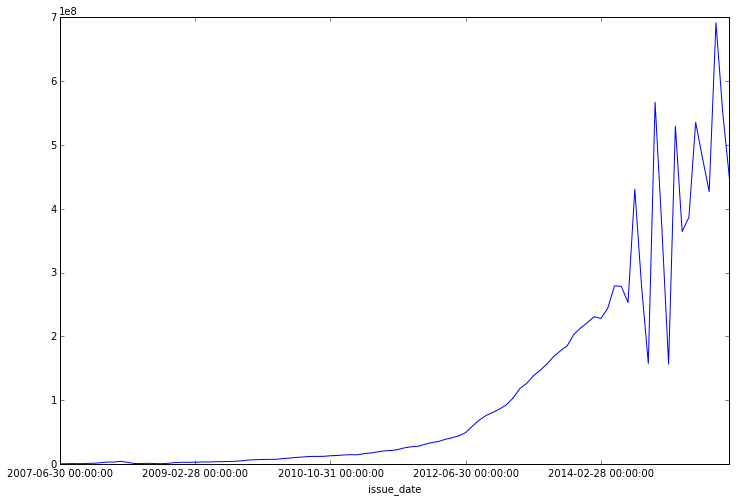

In [86]:
dfm.groupby("issue_date")['loan_amnt'].sum().plot()

In [92]:
dfm['issue_date'].dtypes

dtype('O')

In [88]:
dfm.dtypes

id                               int64
member_id                      float64
loan_amnt                      float64
funded_amnt                    float64
funded_amnt_inv                float64
term                            object
int_rate                       float64
installment                    float64
grade                           object
sub_grade                       object
emp_title                       object
emp_length                      object
home_ownership                  object
annual_inc                     float64
verification_status             object
issue_d                         object
loan_status                     object
pymnt_plan                      object
url                             object
desc                            object
purpose                         object
title                           object
zip_code                        object
addr_state                      object
dti                            float64
delinq_2yrs              

In [91]:
dfm.groupby(lambda x: dfm['issue_date'][x].month)['loan_amnt'].sum()

AttributeError: 'str' object has no attribute 'month'

In [95]:
dfm['recoveries'].describe()

count    756878.000000
mean         37.575400
std         356.634709
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       34355.054705
Name: recoveries, dtype: float64

In [96]:
dfm['loan_status'].describe()

count      756878
unique         11
top       Current
freq       520784
Name: loan_status, dtype: object

In [100]:
dflt_msk = dfm['loan_status'] == 'Charged Off'

In [113]:
bad_loans = dfm[dflt_msk]

In [104]:
dflt_loans.shape


(38029, 74)

In [110]:
(dfm['total_pymnt'] - dfm['total_rec_int'] - dfm['total_rec_prncp'] - dfm['total_rec_late_fee']).describe()


count    7.568780e+05
mean     3.757540e+01
std      3.566347e+02
min     -1.156292e-02
25%     -1.136868e-13
50%      0.000000e+00
75%      2.273737e-13
max      3.435505e+04
dtype: float64

In [112]:
(dflt_loans['total_pymnt'] - dflt_loans['total_rec_int'] - dflt_loans['total_rec_prncp'] - dflt_loans['total_rec_late_fee']).mean()

736.95353829889802

In [115]:
dfm['outstd_prncp'] = dfm['loan_amnt'] - dfm['total_rec_prncp']

In [116]:
dfm['recovery_rate'] = (dfm['loan_amnt'] - dfm['outstd_prncp']) / dfm['loan_amnt']

In [117]:
dfm['recovery_rate']

0         1.000000
1         1.000000
2         1.000000
3         1.000000
4         1.000000
5         1.000000
6         0.161677
7         1.000000
8         0.746392
9         1.000000
10        1.000000
11        0.316138
12        1.000000
13        0.567014
14        1.000000
15        0.582696
16        0.228049
17        0.625000
18        1.000000
19        1.000000
20        1.000000
21        1.000000
22        1.000000
23        0.673845
24        0.453448
25        0.763889
26        0.387752
27        1.000000
28        1.000000
29        1.000000
            ...   
756848    0.050315
756849    0.024238
756850    0.048660
756851    0.025942
756852    0.019281
756853    0.024424
756854    0.050315
756855    0.022937
756856    0.016360
756857    0.045744
756858    0.039467
756859    0.047368
756860    0.049374
756861    0.042459
756862    0.050317
756863    0.044845
756864    0.020630
756865    0.048075
756866    0.022937
756867    0.023345
756868    0.018226
756869    0.

In [118]:
dfm.columns


Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [119]:
COLUMNS_TO_DROP = ['id', 'member_id', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'last_credit_pull_d', 'next_pymnt_d', 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'inq_last_6mths', 'last_fico_range_high', 'last_fico_range_low', 'last_pymnt_d', 'last_pymnt_amnt', 'out_prncp', 'out_prncp_inv', 'purpose', 'pymnt_plan', 'recoveries', 'title', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'url', 'zip_code', 'addr_state', 'funded_amnt', 'funded_amnt_inv', 'emp_title', 'desc', 'earliest_cr_line', 'fico_range_low', 'fico_range_high', 'collection_recovery_fee', 'collections_12_mths_ex_med']


In [122]:
print type(dfm.loc[dflt_msk])

<class 'pandas.core.frame.DataFrame'>


In [123]:
data.columns


Index([u'id', u'member_id', u'loan_amnt', u'funded_amnt', u'funded_amnt_inv',
       u'term', u'int_rate', u'installment', u'grade', u'sub_grade',
       u'emp_title', u'emp_length', u'home_ownership', u'annual_inc',
       u'verification_status', u'issue_d', u'loan_status', u'pymnt_plan',
       u'url', u'desc', u'purpose', u'title', u'zip_code', u'addr_state',
       u'dti', u'delinq_2yrs', u'earliest_cr_line', u'fico_range_low',
       u'fico_range_high', u'inq_last_6mths', u'mths_since_last_delinq',
       u'mths_since_last_record', u'open_acc', u'pub_rec', u'revol_bal',
       u'revol_util', u'total_acc', u'initial_list_status', u'out_prncp',
       u'out_prncp_inv', u'total_pymnt', u'total_pymnt_inv',
       u'total_rec_prncp', u'total_rec_int', u'total_rec_late_fee',
       u'recoveries', u'collection_recovery_fee', u'last_pymnt_d',
       u'last_pymnt_amnt', u'next_pymnt_d', u'last_credit_pull_d',
       u'last_fico_range_high', u'last_fico_range_low',
       u'collections_12_m

In [129]:
data.as_matrix(columns=["loan_amnt", "id"])

array([[  5.00000000e+03,   1.07750100e+06],
       [  2.50000000e+03,   1.07743000e+06],
       [  2.40000000e+03,   1.07717500e+06],
       ..., 
       [  1.30000000e+04,   3.62713330e+07],
       [  1.20000000e+04,   3.64908060e+07],
       [  2.00000000e+04,   3.62712620e+07]])

In [131]:
id_s = data["id"]


In [132]:
n = len(id_s)

In [133]:
n


756878

In [136]:
data["test"] = np.ones(n)

In [137]:
data["test"]

0         1
1         1
2         1
3         1
4         1
5         1
6         1
7         1
8         1
9         1
10        1
11        1
12        1
13        1
14        1
15        1
16        1
17        1
18        1
19        1
20        1
21        1
22        1
23        1
24        1
25        1
26        1
27        1
28        1
29        1
         ..
756848    1
756849    1
756850    1
756851    1
756852    1
756853    1
756854    1
756855    1
756856    1
756857    1
756858    1
756859    1
756860    1
756861    1
756862    1
756863    1
756864    1
756865    1
756866    1
756867    1
756868    1
756869    1
756870    1
756871    1
756872    1
756873    1
756874    1
756875    1
756876    1
756877    1
Name: test, dtype: float64

In [138]:
grade_msk = data['grade'] == "A"

In [141]:
data[grade_msk]


id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
5        1075269    1311441       5000         5000             5000   
17       1069971    1304884       3600         3600             3600   
19       1069742    1304855       9200         9200             9200   
30       1032111    1261745       4375         4375             4375   
31       1069539    1304608      31825        31825            31825   
33       1069591    1304289       5000         5000             5000   
37       1069357    1304251      15000        15000            15000   
40       1067573    1301955       9600         9600             9600   
41       1069506    1304567      12000        12000            12000   
44       1069469    1304526       6000         6000             6000   
46       1069465    1304521       5000         5000             5000   
48       1069287    1304171      10000        10000            10000   
49       1069453    1303701      11000        11000            11000   
74       1068893    1303514      14400        14400            14400   
78       1068997    1303437      15000        15000            15000   
83       1068967    1303403       4500         4500             4500   
98       1068350    1302971       3500         3500             3500   
102      1068508    1302906       6000         6000             6000   
104      1068315    1302930       9500         9500             9500   
110      1068273    1302680       5500         5500             5500   
111      1068274    1302681      11000        11000            11000   
116      1061814    1293438      10000        10000            10000   
118      1068405    1302785      10000        10000            10000   
125      1068158    1302728      18000        18000            18000   
128      1068159    1302729      35000        35000            35000   
129      1068165    1302549      10000        10000            10000   
132      1063270    1295780      10625        10625            10625   
134      1067922    1302299       8850         8850             8850   
135      1067919    1302295       6375         6375             6375   
137      1068111    1302472      11100        11100            11100   
...          ...        ...        ...          ...              ...   
756674  36018501   38720033      15000        15000            15000   
756677  37600553   40363290      10000        10000            10000   
756680  37830455   40593212      25000        25000            25000   
756684  37600541   40363278       8000         8000             8000   
756693  37660435   40423187      30000        30000            30000   
756706  37680281   40453006      17000        17000            17000   
756717  37327559   40090271      25000        25000            24975   
756734  37600331   40363052      10000        10000            10000   
756745  37660156   40422874      15000        15000            15000   
756749  37660119   40422832      35000        35000            35000   
756752  37437158   40199873      13000        13000            13000   
756755  37437123   40199836      12000        12000            12000   
756758  35683282   38378705      22400        22400            22400   
756759  37187901   39960714       8000         8000             8000   
756782  37227667   40000439      30000        30000            30000   
756792  36798941   39551653      10000        10000            10000   
756798  37227561   40000319      12000        12000            11975   
756803  37317482   40080244      22000        22000            21975   
756806  37077424   39840170       5950         5950             5950   
756810  36661474   39414220      21600        21600            21600   
756824  36808291   39561021       8000         8000             8000   
756838  35034116   37717438      16000        16000            16000   
756840  36900303   39653039       1200         1200             1200   
756848  36691397   39434133      20000        20000   